In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier



In [2]:
df = pd.DataFrame()
rows = [29,86,80,166]
for j in range(1,33):
    if j == 24:
        continue
    data = pd.read_excel(f"./data/P{j}/val_aro.xls")
    extracted_rows = data.iloc[rows,:]
    df = pd.concat([df, extracted_rows], ignore_index=True)
df.head()

,image,Valence_score,Arousal_score
0,30,6,0
1,86,5,1
2,80,2,1
3,166,3,0
4,30,8,1


In [3]:
df['class'] = df['image'].apply(lambda x: "Pleasant" if x in [30, 86] else "unpleasant")
df.head()

,image,Valence_score,Arousal_score,class
0,30,6,0,Pleasant
1,86,5,1,Pleasant
2,80,2,1,unpleasant
3,166,3,0,unpleasant
4,30,8,1,Pleasant


In [4]:
df.drop("image",axis=1,inplace = True)

**If your project deals with a regression problem, please use one attribute of your dataset (X_train) along with the target values (y_train) for training a linear regression model.**

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming df is the DataFrame, and 'Valence_score' is one of the features and 'Arousal_score' as target
X = df[['Valence_score']]  # Single attribute for now (you can add more attributes later)
y = df['Arousal_score']    # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
reg = LinearRegression().fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = reg.predict(X_train)


***Calculate MSE, RMSE, MAPE and R2 scores for prediction made by the trained model in A1. 
Perform prediction on the test data and compare the metric values between train and test set.***

In [6]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

def evaluate_regression_performance(y_true, y_pred, dataset_type='Train'):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    metrics_dict = {
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape,
        'R2': r2
    }
    
    print(f"{dataset_type} MSE: {mse}, RMSE: {rmse}, MAPE: {mape}, R2: {r2}")
    return metrics_dict
# Predictions on the training set
y_train_pred = reg.predict(X_train)

# Evaluate training set performance
train_metrics = evaluate_regression_performance(y_train, y_train_pred, dataset_type='Train')

# Predictions on the test set
y_test_pred = reg.predict(X_test)

# Evaluate testing set performance
test_metrics = evaluate_regression_performance(y_test, y_test_pred, dataset_type='Test')

Train MSE: 0.249918840903903, RMSE: 0.49991883431603473, MAPE: 1125534398767684.0, R2: 0.0002226286942230704
Test MSE: 0.25171868050673885, RMSE: 0.5017157367541294, MAPE: 1455271596293516.2, R2: -0.09252899525494263


***Perform k-means clustering on your data. Please remove / ignore the target variable for 
performing clustering***

In [7]:
from sklearn.cluster import KMeans

# Prepare data (ignoring target variable)
X_cluster = df[['Valence_score', 'Arousal_score']]

# Perform K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X_cluster)

# Get labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

print(f"Labels: {labels}")
print(f"Cluster Centers: {centers}")


Labels: [1 2 0 2 1 1 1 1 2 0 2 0 1 0 0 0 2 1 2 2 2 1 2 1 1 0 2 2 1 1 0 2 1 1 1 1 2
 2 1 1 0 1 1 0 1 0 1 1 2 0 0 1 1 1 1 1 1 1 2 0 2 0 1 2 0 1 1 1 0 0 0 0 2 2
 2 2 2 2 1 1 1 2 1 2 2 2 1 0 1 1 1 0 0 1 1 0 0 0 1 0 2 2 1 2 1 2 2 1 2 1 0
 0 0 1 0 2 1 2 2 1 1 0 2 0]
Cluster Centers: [[1.57575758 0.51515152]
 [6.94339623 0.47169811]
 [3.97368421 0.44736842]]


***For the clustering done in A4, calculate the: (i) Silhouette Score, (ii) CH Score and (iii) DB Index.***

In [8]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Fit KMeans to ensure labels are consistent
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)

# Now calculate the clustering metrics
silhouette = silhouette_score(X_train, kmeans.labels_)
ch_score = calinski_harabasz_score(X_train, kmeans.labels_)
db_score = davies_bouldin_score(X_train, kmeans.labels_)

print(f"Silhouette Score: {silhouette}")
print(f"Calinski-Harabasz Score: {ch_score}")
print(f"Davies-Bouldin Index: {db_score}")


Silhouette Score: 0.678886081204167
Calinski-Harabasz Score: 542.7879054680418
Davies-Bouldin Index: 0.45525351246223256


***Perform k-means clustering for different values of k. Evaluate the above scores for each k value. 
Make a plot of the values against the k value to determine the optimal cluster count.***

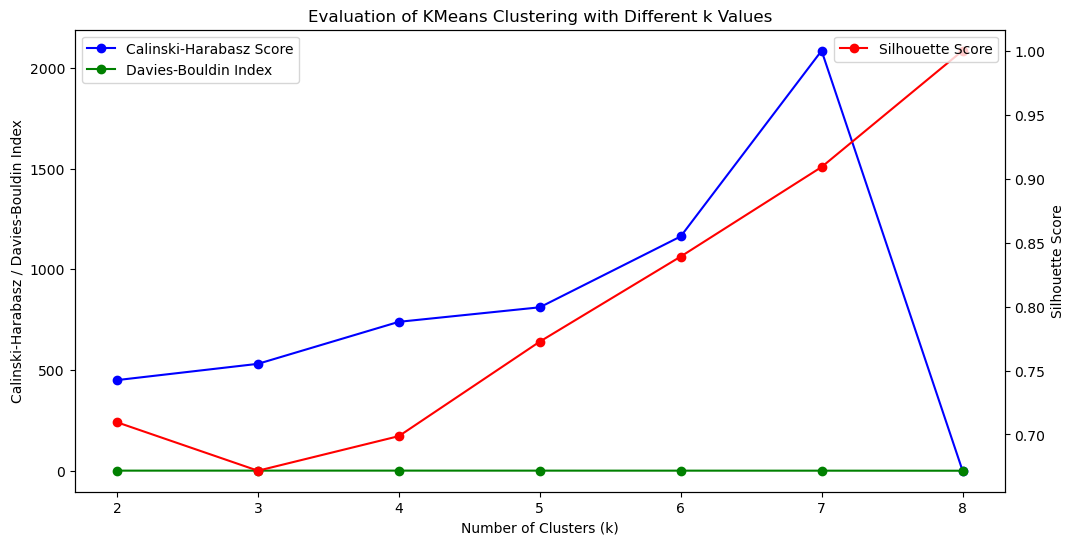

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluate_kmeans_clustering(X, k_values):
    silhouette_scores = []
    ch_scores = []
    db_scores = []

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        
        labels = kmeans.labels_
        
        # Calculate metrics
        silhouette = silhouette_score(X, labels)
        ch_score = calinski_harabasz_score(X, labels)
        db_score = davies_bouldin_score(X, labels)
        
        silhouette_scores.append(silhouette)
        ch_scores.append(ch_score)
        db_scores.append(db_score)

    # Plot the results
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Primary y-axis (for Calinski-Harabasz and Davies-Bouldin)
    ax1.set_xlabel('Number of Clusters (k)')
    ax1.set_ylabel('Calinski-Harabasz / Davies-Bouldin Index')
    ax1.plot(k_values, ch_scores, label='Calinski-Harabasz Score', marker='o', color='b')
    ax1.plot(k_values, db_scores, label='Davies-Bouldin Index', marker='o', color='g')
    ax1.legend(loc='upper left')
    ax1.set_title('Evaluation of KMeans Clustering with Different k Values')

    # Secondary y-axis (for Silhouette Score)
    ax2 = ax1.twinx()
    ax2.set_ylabel('Silhouette Score')
    ax2.plot(k_values, silhouette_scores, label='Silhouette Score', marker='o', color='r')
    ax2.legend(loc='upper right')

    plt.show()


k_values = range(2, 9)  # Values of k to try
evaluate_kmeans_clustering(X_train, k_values)


***. Using elbow plot, determine the optimal k value for k-means clustering. Use below code.***

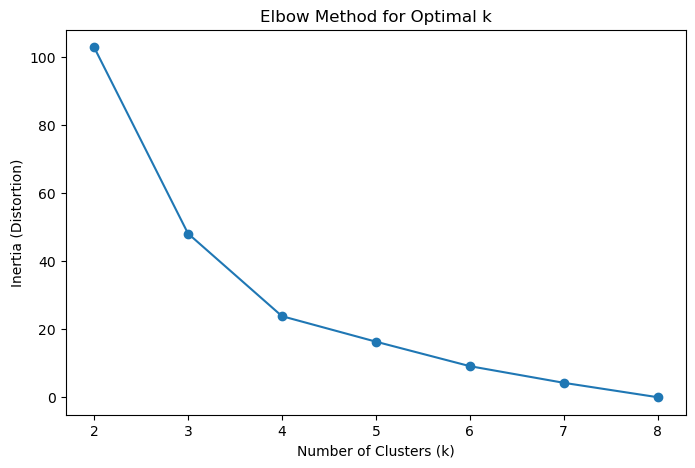

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def plot_elbow_method(X, k_values):
    
    # List to store inertia (within-cluster sum of squares)
    distortions = []

    # Loop over different values of k and calculate inertia
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)  # Inertia is the sum of squared distances to nearest cluster center

    # Plot the inertia values to visualize the "elbow"
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, distortions, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (Distortion)')
    plt.title('Elbow Method for Optimal k')
    plt.show()

k_values = range(2, 9)  # Values of k to try
plot_elbow_method(X_train, k_values)
